In [44]:
!pip install opendatasets

In [45]:
import opendatasets as od
od.download('https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset')


Skipping, found downloaded files in "./ushealthinsurancedataset" (use force=True to force download)


In [46]:
import pandas as pd
data= pd.read_csv("/content/ushealthinsurancedataset/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [66]:
data['children'].unique()

array([0, 1, 3, 2, 5, 4])

In [47]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [48]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [49]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
data['sex']= le.fit_transform(data['sex'])
data['smoker']= le.fit_transform(data['smoker'])
data['region']= le.fit_transform(data['region'])

In [50]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [51]:
x= data.drop('charges',axis=1)
y= data['charges']

In [52]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2,random_state=40)


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [54]:
model= Sequential()

In [55]:
model.add(Dense(100,activation="relu",input_shape=(6,)))

In [56]:
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))


In [57]:
model.add(Dense(1,activation="linear"))

In [58]:
model.compile(optimizer="adam",loss="mean_squared_error",metrics=["accuracy"])

In [59]:
history= model.fit(xtrain,ytrain,epochs=200,validation_split=0.2)

Epoch 1/200
27/27 [==============================] - 5s 27ms/step - loss: 292687424.0000 - accuracy: 0.0000e+00 - val_loss: 279296800.0000 - val_accuracy: 0.0000e+00
Epoch 2/200
27/27 [==============================] - 0s 14ms/step - loss: 134867040.0000 - accuracy: 0.0000e+00 - val_loss: 179472032.0000 - val_accuracy: 0.0000e+00
Epoch 3/200
27/27 [==============================] - 0s 12ms/step - loss: 128908512.0000 - accuracy: 0.0000e+00 - val_loss: 148532544.0000 - val_accuracy: 0.0000e+00
Epoch 4/200
27/27 [==============================] - 0s 12ms/step - loss: 124187288.0000 - accuracy: 0.0000e+00 - val_loss: 165326464.0000 - val_accuracy: 0.0000e+00
Epoch 5/200
27/27 [==============================] - 0s 14ms/step - loss: 124996296.0000 - accuracy: 0.0000e+00 - val_loss: 158567920.0000 - val_accuracy: 0.0000e+00
Epoch 6/200
27/27 [==============================] - 0s 14ms/step - loss: 123495904.0000 - accuracy: 0.0000e+00 - val_loss: 151708928.0000 - val_accuracy: 0.0000e+00
Epoc

In [60]:
from sklearn.metrics import r2_score
ypred= model.predict(xtest)
r2_score(ytest,ypred)

9/9 [==============================] - 0s 2ms/step


0.8437523829745155

In [61]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,ypred)

3122.6216652915114

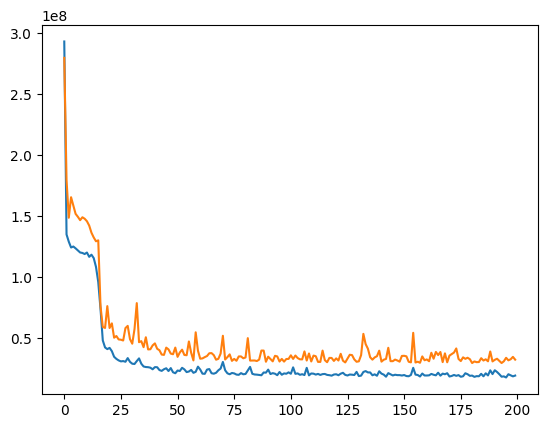

In [62]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [63]:
import pickle
with open('model.pkl','wb') as file:
  pickle.dump(model,file)

In [64]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
